In [2]:
using CausalityTools
include("../Utils/entropy.jl")
using Random
using BenchmarkTools

rng = MersenneTwister(145)

a = rand(rng, 0:10, 100)
b = rand(rng, 0:10, 100)

est = Kraskov(k=1)

print("Current method :")
foo = @btime TE(Int.(a .> 0), Int.(b .> 0))
println("The result is $foo.\n")


print("True transfer entropy :")
a = float.(a)
b = float.(b)
foo2 = @btime transferentropy(a, b, est)
println("The result is $foo2.\n")

print("CCM :")
foo3 = @btime crossmap(a, b, 2, 1)
println("The result is $foo3.\n")

Current method :  5.438 μs (52 allocations: 14.39 KiB)
The result is 0.010908430923173998.

True transfer entropy :  403.584 μs (6158 allocations: 355.05 KiB)
The result is NaN.

CCM :  46.625 μs (772 allocations: 48.58 KiB)
The result is 0.6095690789010543.



PyPlot.Figure(PyObject <Figure size 640x480 with 1 Axes>)

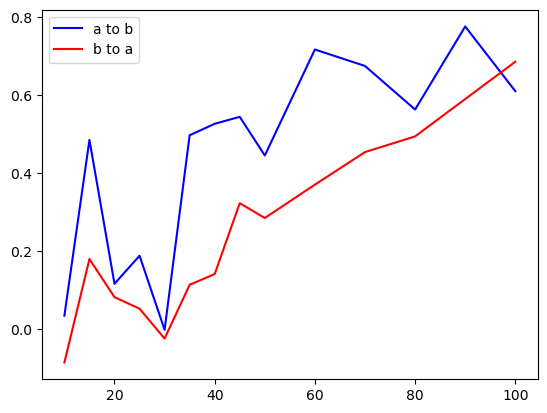

In [4]:
import PyPlot as plt

rng = MersenneTwister(145)

a = rand(rng, 0:10, 100)
b = rand(rng, 0:10, 100)

a = float.(a)
b = float.(b)

Ls = [10:5:50; 60:10:100]

begin
    test = [crossmap(a[1:L], b[1:L], 2, 1) for L in Ls]
    test2 = [crossmap(b[1:L], a[1:L], 2, 1) for L in Ls]
end

plt.figure()
plt.plot(Ls, test, "b-", label="a to b")
plt.plot(Ls, test2, "r-", label="b to a")
plt.legend()
show(plt.gcf())

In [ ]:
using BenchmarkTools
using CausalityTools
using StatsBase: minimum, maximum, mean, std

function standardize(x)
    std_ = std(x, dims=1)
    return (x .- mean(x, dims=1)) ./ ifelse.(std_ .> 0, std_, ones(size(std_)))
end

B = 10
d = 3
τ = 1
alpha = 0.001

cuttoff = 0.5
cuttoff2 = 0.01

Nts = 13*24*2

func(x, y) = pvalue(jdd(OneSampleTTest, x, y, B=B, D=d, τ=τ, μ0=0.0), tail=:right) < alpha ? 1 : 0

tot = 0

for i = 1:10000
    x = standardize(rand(0:10, Nts))
    y = standardize(rand(0:10, Nts))

    # x = rand(0:10, Nts)
    # y = rand(0:10, Nts)

    tot += func(x ,y)
end

println("jdd : $tot")

In [ ]:
using PyPlot: @L_str, latexstring
using Printf

annot = Matrix{String}(undef, size(mean_value))
for i in eachindex(annot)
    foo = @sprintf("%.1e", mean_value[i])
    deci = split(foo, 'e')[1]
    power = parse(Int, split(foo, 'e')[2])
    power = string(power)
    annot[i] = latexstring(deci, "\\cdot 10^{", power, "}")
end

In [ ]:
import Seaborn as sns

result = load_data("/Users/cyrilvallez/Desktop/Thesis/Results/Find_thresholds/new_test2_TE.jld2")
labels = ["None", "Q(0.5)", "Q(0.75)", "Q(0.9)", "max", "2max", "4max"]
thresholds = 0:0.1:0.6


mean_value = Matrix{Float64}(undef, size(result))
for i in eachindex(result)
    mean_value[i] = mean(result[i])
end

if any(mean_value .== 0)
    vmin = minimum(mean_value[mean_value .!= 0])*0.5
else
    vmin = minimum(mean_value)
end

plt.figure(figsize=[6.4, 4.8].*1.2)
sns.heatmap(mean_value, annot=annot, cmap="rocket_r", fmt="", norm=plt.matplotlib.colors.LogNorm(vmin=vmin, clip=true))
plt.xlabel("Threshold")
plt.ylabel("Limit value")
xloc, xlabels = plt.xticks()
plt.xticks(xloc, thresholds)
yloc, ylabels = plt.yticks()
plt.yticks(yloc, labels, rotation="horizontal")
plt.gcf();

In [ ]:
import Seaborn as sns

result = load_data("/Users/cyrilvallez/Desktop/Thesis/Results/Find_thresholds/new_test2_TE.jld2")
labels = ["None", "Q(0.5)", "Q(0.75)", "Q(0.9)", "max", "2max", "4max"]
thresholds = 0:0.1:0.6


mean_value = Matrix{Float64}(undef, size(result))
for i in eachindex(result)
    mean_value[i] = mean(result[i])
end

if any(mean_value .== 0)
    vmin = minimum(mean_value[mean_value .!= 0])*0.5
else
    vmin = minimum(mean_value)
end

plt.figure(figsize=[6.4, 4.8].*1.2)
sns.heatmap(mean_value, annot=true, cmap="rocket_r", fmt=".2g", norm=plt.matplotlib.colors.LogNorm(vmin=vmin, clip=true))
plt.xlabel("Threshold")
plt.ylabel("Limit value")
xloc, xlabels = plt.xticks()
plt.xticks(xloc, thresholds)
yloc, ylabels = plt.yticks()
plt.yticks(yloc, labels, rotation="horizontal")
plt.gcf();

In [ ]:
df = load_dataset(Skripal)

In [ ]:
using Dates
to_datetime = x -> DateTime(split(x, '.')[1], "yyyy-mm-ddTHH:MM:SS")
df."created_at" = to_datetime.(df."created_at")

In [ ]:
sort!(df, :follower_count, rev=true)

In [ ]:
minimum(df.created_at)

In [ ]:
maximum(df.created_at)

In [ ]:
decide = x -> x < Date(2018, 03, 18)

a = DateTime(2018, 03, 18, 00, 00, 01)
b = DateTime(2018, 03, 17, 23, 59, 59)
c = DateTime(2018, 03, 18, 00, 00, 00)

In [ ]:
using StatsBase
include("../Engine/Engine.jl")
using .Engine
import PyPlot as plt
import Seaborn as sns

In [ ]:
filename = "/Users/cyrilvallez/Desktop/Thesis/Results/Find_thresholds/N_1000_JDD.jld2"

result2 = load_data(filename)

In [ ]:
thresholds2 = [1, 1e-1, 5e-2, 1e-2, 5e-3, 1e-3, 5e-4, 1e-4]
labels2 = ["None", "Q(0.5)", "Q(0.25)", "Q(0.1)", "min", "min/2", "min/4", "min/6"]

mean_value2 = Matrix{Float64}(undef, size(result2))
for i in eachindex(result2)
    mean_value2[i] = mean(result2[i])
end

# Set vmin a little lower than minimum, so that 0 appears on a color scale lower than minimum when using clip=true
if any(mean_value2 .== 0)
    vmin = minimum(mean_value2[mean_value2 .!= 0])/2
else
    vmin = minimum(mean_value2)
end

plt.figure(figsize=[6.4, 4.8].*1.2)
sns.heatmap(mean_value2, annot=true, cmap="rocket_r", norm=plt.matplotlib.colors.LogNorm(vmin=vmin, clip=true))
plt.xlabel("p-value")
plt.ylabel("Limit value")
xloc, xlabels = plt.xticks()
plt.xticks(xloc, thresholds2)
yloc, ylabels = plt.yticks()
plt.yticks(yloc, labels2, rotation="horizontal")
plt.savefig("/Users/cyrilvallez/Desktop/Thesis/Results/Find_thresholds/N_1000_JDD.pdf", bbox_inches="tight")
plt.gcf();

In [ ]:
limit = x -> maximum(x)*2
# limit = RandomShuffle()
show(limit)

In [ ]:
foo = eval(Meta.parse("x -> maximum(x)*2"))
foo2 = eval(Meta.parse("x -> maximum(x)"))

In [ ]:
parse(Function, "x->maximum(x)*2")

In [ ]:
using DataFrames
include("../Engine/Engine.jl")
using .Engine

datafolder = "/Users/cyrilvallez/Desktop/Thesis/Data/Twitter/COP26_processed"
datafiles = [file for file in readdir(datafolder, join=true) if occursin(".json", file)]
# frames = [Helpers.load_json(file) for file in datafiles]
# data = vcat(frames...)

In [ ]:
frames = [Helpers.load_json(file) for file in datafiles]
# data = vcat(frames...)

In [ ]:
igg = InfluenceGraphGenerator(SimpleTE, threshold=0.01)

In [ ]:
"""
Standardize data, handling the case when one column contains only same value (this happens in our case with vectors of only 0s).
"""
function standardize(x)
    std_ = std(x, dims=1)
    return (x .- mean(x, dims=1)) ./ ifelse.(std_ .> 0, std_, ones(size(std_)))
end

In [ ]:
using StatsBase
# x = sample([0,1], AnalyticWeights([0.9, 0.1]), 200)
# x = sample([0,1], AnalyticWeights([0.5, 0.5]), 200)
x = rand(200)
y = zeros(size(x))
y[1] = 0.5*x[1] + 2*x[2]
y[end] = 0.5*x[end] + 2*x[end-1]
for i = 2:length(y)-1
    y[i] = 0.5*x[i] + 2*x[i-1] + 2*x[i+1]
end
# y .+= 0.1 .* rand(200)

In [ ]:
plt.figure()
plt.scatter(x, y);

In [ ]:
using DataFrames
include("../Engine/Engine.jl")
using .Engine
using StatsBase: mean, minimum, maximum, quantile, std

In [ ]:
igg = InfluenceGraphGenerator(JointDistanceDistribution, surrogate=nothing)

N = 10000
distribution = []
for i = 1:N
    x = rand(200)
    y = rand(200)
    x = standardize(x)
    y = standardize(y)

    push!(distribution, igg.causal_function(x, y))
end

quantile(distribution, 0.5)

In [ ]:
x = rand(200)
igg.causal_function(x, x)

In [ ]:
quantile(distribution, 0.05)

In [ ]:
igg = InfluenceGraphGenerator(SimpleTE, threshold=0.06)

N = 100
distribution = []
for i = 1:N
    # x = sample([0,1], AnalyticWeights([0.9, 0.1]), 200)
    # x = rand(0:10, 200)
    x = sample(0:10, AnalyticWeights(vcat(0.5, [0.5/10 for i = 1:10]...)), 200)
    # y = sample([0,1], AnalyticWeights([0.5, 0.5]), 200)
    y = zeros(size(x))
    y[1] = 0.5*x[1] + 2*x[2]
    y[end] = 0.5*x[end] + 2*x[end-1]
    for i = 2:length(y)-1
        y[i] = 0.5*x[i] + 2*x[i-1] + 2*x[i+1]
    end

    push!(distribution, igg.causal_function(x, y))
end

sum(distribution)

In [ ]:
using PyPlot: @L_str

negatives = load_data("/Users/cyrilvallez/Desktop/Thesis/Results/Find_thresholds/N_1000_TE.jld2")
positives = load_data("/Users/cyrilvallez/Desktop/Thesis/Results/Find_thresholds_2/N_10_TE.jld2")

labels = ["None", "Q(0.5)", "Q(0.75)", "Q(0.9)", L"\max", L"2\cdot \max", L"4\cdot \max"]

mean_positives = Matrix{Float64}(undef, size(positives))
for i in eachindex(positives)
    mean_positives[i] = mean(positives[i])
end

mean_negatives = Matrix{Float64}(undef, size(negatives))
for i in eachindex(negatives)
    mean_negatives[i] = mean(negatives[i])
end

plt.figure()
for i = 1:size(positives)[1]
    plt.plot(mean_negatives[:, i], mean_positives[:, i], label=labels[i])
end
plt.plot(0:0.001:1, 0:0.001:1, label=L"y=x", linestyle="--")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.grid()
plt.xscale("log")
plt.gcf();

In [ ]:
negatives = load_data("/Users/cyrilvallez/Desktop/Thesis/Results/Find_thresholds/N_1000_JDD.jld2")
positives = load_data("/Users/cyrilvallez/Desktop/Thesis/Results/Find_thresholds_2/N_10_JDD.jld2")

labels = ["None", "Q(0.5)", "Q(0.25)", "Q(0.1)", "min", "min/2", "min/4", "min/6"]

mean_positives = Matrix{Float64}(undef, size(positives))
for i in eachindex(positives)
    mean_positives[i] = mean(positives[i])
end

mean_negatives = Matrix{Float64}(undef, size(negatives))
for i in eachindex(negatives)
    mean_negatives[i] = mean(negatives[i])
end

plt.figure()
for i = 1:size(positives)[1]
    plt.plot(mean_negatives[:, i], mean_positives[:, i], label=labels[i])
end
plt.plot(0:0.001:1, 0:0.001:1, label=L"y=x", linestyle="--")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.grid()
plt.xscale("log")
plt.gcf();

In [ ]:
df = Helpers.load_json("/Users/cyrilvallez/Desktop/Thesis/Data/Twitter/COP26_processed/2021-10-18T00-00_to_2021-10-22T00-00.json")

In [ ]:
show(df, allcols=true)

In [ ]:
unique(df.category)

In [ ]:
foo = df[df.category .== Ref(["retweeted"]), :]

In [ ]:
sum(startswith.(foo.text, Ref("RT")))

In [ ]:
test = foo[.!startswith.(foo.text, Ref("RT")), :]

In [ ]:
test.text[18]

In [ ]:
test.original_text[2]

In [ ]:
a = [1 1 1; 2 2 2; 3 3 3]
b = [2 2 2; 2 2 2; 2 2 2]

a ./ b

In [ ]:
a = Matrix{Matrix}(undef, 2, 2)
b = Matrix{Matrix}(undef, 2, 2)
a[1, 1] = [1 2; 3 4]
a[1, 2] = [0 0; 1 2]
a[2, 1] = [1 1; 1 1]
a[2, 2] = [0 0; 1 0]

b[1, 1] = [0 1; 2 5]
b[1, 2] = [0 0; 0 0]
b[2, 1] = [-1 0; 2 3]
b[2, 2] = [1 3; 1 0]

In [ ]:
c = Matrix{Matrix}(undef, 2, 2)
d = Matrix{Matrix}(undef, 2, 2)

c[1, 1] = rand(1:4, 2, 2)
c[1, 2] = rand(1:4, 2, 2)
c[2, 1] = rand(1:4, 2, 2)
c[2, 2] = rand(1:4, 2, 2)

d[1, 1] = rand(1:4, 2, 2)
d[1, 2] = rand(1:4, 2, 2)
d[2, 1] = rand(1:4, 2, 2)
d[2, 2] = rand(1:4, 2, 2)

In [ ]:
e = Matrix{Matrix}(undef, 2, 2)
f = Matrix{Matrix}(undef, 2, 2)

e[1, 1] = rand(1:4, 2, 2)
e[1, 2] = rand(1:4, 2, 2)
e[2, 1] = rand(1:4, 2, 2)
e[2, 2] = rand(1:4, 2, 2)

f[1, 1] = rand(1:4, 2, 2)
f[1, 2] = rand(1:4, 2, 2)
f[2, 1] = rand(1:4, 2, 2)
f[2, 2] = rand(1:4, 2, 2)

In [ ]:
foo1 = [a, b, c]
foo2 = [d, e, f]

In [ ]:
foo = [foo1, foo2]

In [ ]:
total = sum(foo)

In [ ]:
c .+ f

In [ ]:
for i = 1:length(total)
    f = x -> ifelse.(x .<= 2, -2, x)
    indices = (total[i] .<= 2) .<= 2
    total[i][indices] = -1
    # broadcast()
end

In [ ]:
x = [0 0 2; 1 1 4; 3 0 5]
ifelse.(x .<= 2, -2, x)

In [ ]:
total[1]

In [ ]:
map!.(x -> ifelse(x < 2, -2, x), total[1], total[1])

In [ ]:
total[1]

In [ ]:
total[1]

In [5]:
include("../Engine/Engine.jl")
using .Engine

using DataFrames, StatsBase
using BenchmarkTools
import PyPlot as plt
import Seaborn as sns

In [64]:
using Dates

df = load_dataset(COP26)

df = df[.~ismissing.(df."domain"), :]
if eltype(df."created_at") == String
    to_datetime = x -> DateTime(split(x, '.')[1], "yyyy-mm-ddTHH:MM:SS")
    df."created_at" = to_datetime.(df."created_at")
end

df = PreProcessing.cop_26_dates(df)
df = PreProcessing.trust_score(df)
df = transform(groupby(df, "username"), "created_at" => length => "count")

tweeters = df[df.effective_category .== "tweet", :]
retweeters = df[df.effective_category .== "retweet", :]

weights, u, v, nodes = PreProcessing.IP_graph(df)

I, P, residuals = PreProcessing.IP_scores(u, v)

# Sort in the order of most influence
sorting = sortperm(I, rev=true)
nodes = nodes[sorting]
I = I[sorting]
P = P[sorting]

# Extract dataframes of 500 most influentials according to I score
isin = (x,y) -> x in y
influentials = tweeters[isin.(tweeters.username, Ref(nodes[1:500])), :]
foo = combine(groupby(influentials, "username"), "action" => (x -> sum(x .== "U")) => "U_count")

bad_users = foo.username[foo.U_count .> 0]
bad_users_rank = [findall(user .== nodes) for user in bad_users]

In [34]:
res[60]

0.0013496370223671761

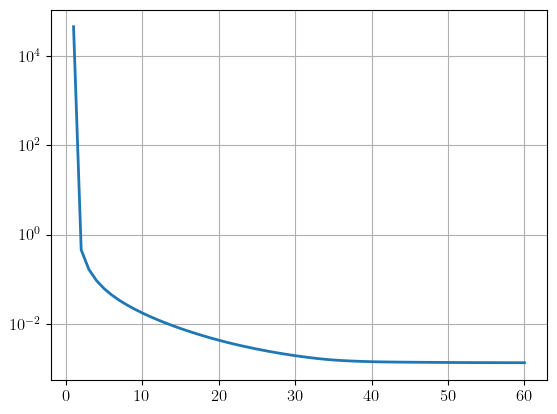

In [33]:
res_ = res[1:60]
plt.figure()
plt.plot(1:length(res_), res_)
plt.yscale("log")
res[60]


In [ ]:
initial_actors = unique(test[ismissing.(test.rt_from), "username"])
counter = []

rts = test[.!ismissing.(test.rt_from), :]
# mapping = countmap(rts)
# transform(groupby(df, "username"), "created_at" => length => "tweet_count")

for (i, a) in enumerate(initial_actors)
    indices = findall(rts.rt_from .== a)
    push!(counter, rts.username[indices])
    # counter[i] = sum(rts.rt_from .== a)
end

In [ ]:
N = [length(i) for i in counter]
sorting = sortperm(N, rev=true)
N = N[sorting]
initial_actors = initial_actors[sorting]
counter = counter[sorting]

In [ ]:
counter[1]

In [ ]:
initial_actors[1:30]

In [ ]:
initial_actors = unique(test[ismissing.(test.rt_from), "username"]);

In [ ]:
using BenchmarkTools

counter = []

@btime begin
    indices = findall(rts.rt_from .== initial_actors[1])
    push!(counter, rts.username[indices])
end

In [ ]:
# foo = test[test.category .== Ref(["tweeted"]), :]
# foo = transform(groupby(foo, "username"), "created_at" => length => "tweet_count")
# foo = foo[foo.tweet_count .>= 1, :]
# length(unique(foo.username))


initial_actors = unique(test[.ismissing.(test.rt_from), "username"])

In [ ]:
sum(.!ismissing.(test.rt_from))

In [ ]:
foo = test[startswith.(test.text, Ref("RT @")) .&& test.category .!= Ref(["retweeted"]), :]

In [ ]:
show(foo, allcols=true)

In [ ]:
find_user(test.text[1])

In [ ]:
length(unique(test.username))

In [ ]:
sum(test.category .== Ref(["quoted"]))

In [ ]:
followers[500]

In [ ]:
sum(followers .== 0)

In [ ]:
261259/50

## DECREASE BINS LOGARITHMICALLY

In [ ]:
25929^2/520^2*10/60/60

In [ ]:
sum(0 .< followers .< 50)

In [ ]:
sum(followers .== 0)

In [ ]:
sum(followers .> 500000)

In [ ]:
test = collect(1:10)
sorting = sortperm(test, rev=true)
test[sorting]